In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

In [3]:
img = cv2.imread('lena.jpg')
#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]

In [4]:
img_fft = np.fft.fft2(grayImage)
img_fftshift = np.fft.fftshift(img_fft)
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 方式1

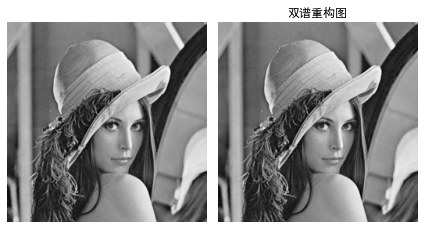

In [5]:
img_rebulid = np.fft.ifft2(np.abs(img_fft)*np.exp(1j*(np.angle(img_fft))))
rebulid = np.real(img_rebulid)
plt.figure(figsize=(6, 8))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.axis('off')
plt.subplot(122), plt.imshow(rebulid, 'gray'), plt.axis('off'), plt.title('双谱重构图')
plt.tight_layout()
plt.show()

## 方式2

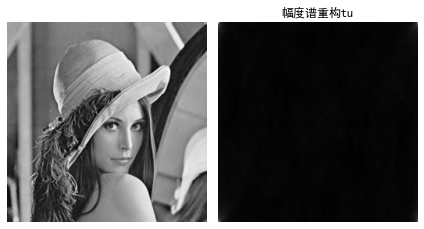

In [6]:
img_magnitude = np.log(np.abs(img_fftshift))
magnitude = np.real(np.fft.ifft2(np.abs(img_fft)))
plt.figure(figsize=(6, 8))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.axis('off')
plt.subplot(122), plt.imshow(magnitude, 'gray'), plt.axis('off'), plt.title('幅度谱重构tu')
plt.tight_layout()
plt.show()

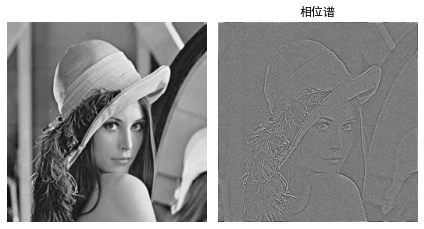

In [8]:
# img_phase = np.log(np.angle(img_fftshift)*180/math.pi)
phase = np.real(np.fft.ifft2(np.exp(1j*np.angle(img_fft))))
plt.figure(figsize=(6, 8))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.axis('off')
plt.subplot(122), plt.imshow(phase, 'gray'), plt.axis('off'), plt.title('相位谱')
plt.tight_layout()
plt.show()